In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
df = pd.read_csv('/content/player_stats.csv', encoding='latin1')
pd.set_option('display.max_columns', None)
df.head(20)

player         country  height  weight  age  \
0   Cristian Castro Devenish        Colombia     192      84   22   
1           Silaldo Taffarel          Brazil     181      80   31   
2              Thomas DÃ¤hne         Germany     193      84   29   
3          Michael Sollbauer         Austria     187      86   33   
4              Diego Segovia         Uruguay     191      80   23   
5             ClÃ¡udio Ramos        Portugal     183      83   31   
6            CÃ©dric Zesiger     Switzerland     194      88   25   
7                Pedro Gomes        Portugal     185      75   20   
8           Famara DiÃ©dhiou         Senegal     189      80   30   
9               Sibiry Keita            Mali     173      67   22   
10        Abdullah Al Hamdan    Saudi Arabia     186      78   23   
11          Patrick Lienhard         Germany     169      65   31   
12          Vilmer RÃ¶nnberg          Sweden     193      88   21   
13                Prabir Das           India     171      67   29   
14          Tyreece Campbell         England     172      65   19   
15              John Souttar        Scotland     189      75   26   
16         Xavier Chavalerin          France     178      66   32   
17            Kim Geon Woong  Korea Republic     185      81   26   
18            JÃ©rÃ©mie Broh           Italy     180      71   26   
19            Eirik Blikstad          Norway     183      75   19   

                 club  ball_control  dribbling  marking  slide_tackle  \
0      Atl. Nacional             55         43      NaN            68   
1        Corinthians             69         70      NaN            56   
2      Holstein Kiel             25         12      NaN            13   
3      SK Rapid Wien             46         48      NaN            66   
4      Independiente             14          8      NaN            14   
5           FC Porto             20         16      NaN            13   
6     BSC Young Boys             52         43      NaN            71   
7        Boavista FC             41         33      NaN            65   
8         Granada CF             68         67      NaN            16   
9          KAS Eupen             65         67      NaN            30   
10          Al Hilal             62         59      NaN            30   
11    SC Freiburg II             61         59      NaN            58   
12     Varbergs BoIS             45         28      NaN            54   
13      Bengaluru FC             54         51      NaN            50   
14      Charlton Ath             55         57      NaN            24   
15           Rangers             70         60      NaN            70   
16      ESTAC Troyes             74         70      NaN            68   
17   Jeonbuk Hyundai             59         56      NaN            56   
18           Palermo             67         66      NaN            62   
19  StrÃ¸msgodset IF             50         48      NaN            51   

    stand_tackle  aggression  reactions  att_position  interceptions  vision  \
0             73          72         68            30             65      30   
1             58          62         70            69             70      64   
2             16          27         65            17             20      49   
3             69          71         64            48             66      29   
4             16          28         50            10             12      38   
5             17          27         70            10             21      55   
6             72          63         61            37             68      34   
7             70          46         54            27             56      25   
8             22          61         64            72             22      50   
9             33          40         47            65             29      58   
10            24          51         58            62             31      57   
11            59          60         58            60             60      63  

In [ ]:
df.shape

(5682, 41)

In [ ]:
df1 = df.drop(['player', 'country', 'club'], axis=1)
# Function to clean prices
def clean_price(price):
    # Remove dollar sign
    price = price.replace('$', '')
    # Fix multiple decimal points by keeping only the last one
    if price.count('.') > 1:
        price = re.sub(r'\.(?=.*\.)', '', price)
    return float(price)

# Apply the cleaning function to the 'prices' column
df1['value'] = df1['value'].apply(clean_price)
df1 = df1.drop('marking', axis=1)
df1.head(20)

height  weight  age  ball_control  dribbling  slide_tackle  stand_tackle  \
0      192      84   22            55         43            68            73   
1      181      80   31            69         70            56            58   
2      193      84   29            25         12            13            16   
3      187      86   33            46         48            66            69   
4      191      80   23            14          8            14            16   
5      183      83   31            20         16            13            17   
6      194      88   25            52         43            71            72   
7      185      75   20            41         33            65            70   
8      189      80   30            68         67            16            22   
9      173      67   22            65         67            30            33   
10     186      78   23            62         59            30            24   
11     169      65   31            61         59            58            59   
12     193      88   21            45         28            54            58   
13     171      67   29            54         51            50            51   
14     172      65   19            55         57            24            29   
15     189      75   26            70         60            70            75   
16     178      66   32            74         70            68            71   
17     185      81   26            59         56            56            63   
18     180      71   26            67         66            62            65   
19     183      75   19            50         48            51            55   

    aggression  reactions  att_position  interceptions  vision  composure  \
0           72         68            30             65      30         50   
1           62         70            69             70      64         54   
2           27         65            17             20      49         48   
3           71         64            48             66      29         70   
4           28         50            10             12      38         34   
5           27         70            10             21      55         44   
6           63         61            37             68      34         56   
7           46         54            27             56      25         46   
8           61         64            72             22      50         64   
9           40         47            65             29      58         59   
10          51         58            62             31      57         53   
11          60         58            60             60      63         49   
12          50         50            25             54      48         48   
13          86         55            56             51      52         45   
14          31         46            44             21      48         46   
15          67         68            33             66      59         71   
16          72         73            68             74      72         69   
17          69         57            55             63      59         55   
18          70         66            67             69      64         54   
19          51         43            32             55      33         45   

    crossing  short_pass  long_pass  acceleration  stamina  strength  balance  \
0         33          64         49            41       55        86       40   
1         60          63         63            64       87        81       42   
2         14          35         18            46       38        68       41   
3         44          58         53            35       73        82       56   
4         11          23         20            38       28        64       24   
5         10          25         23            55       44        75       65   
6         43          60         55            55       75        84       33   
7         26          49         45            63       6

<Axes: >

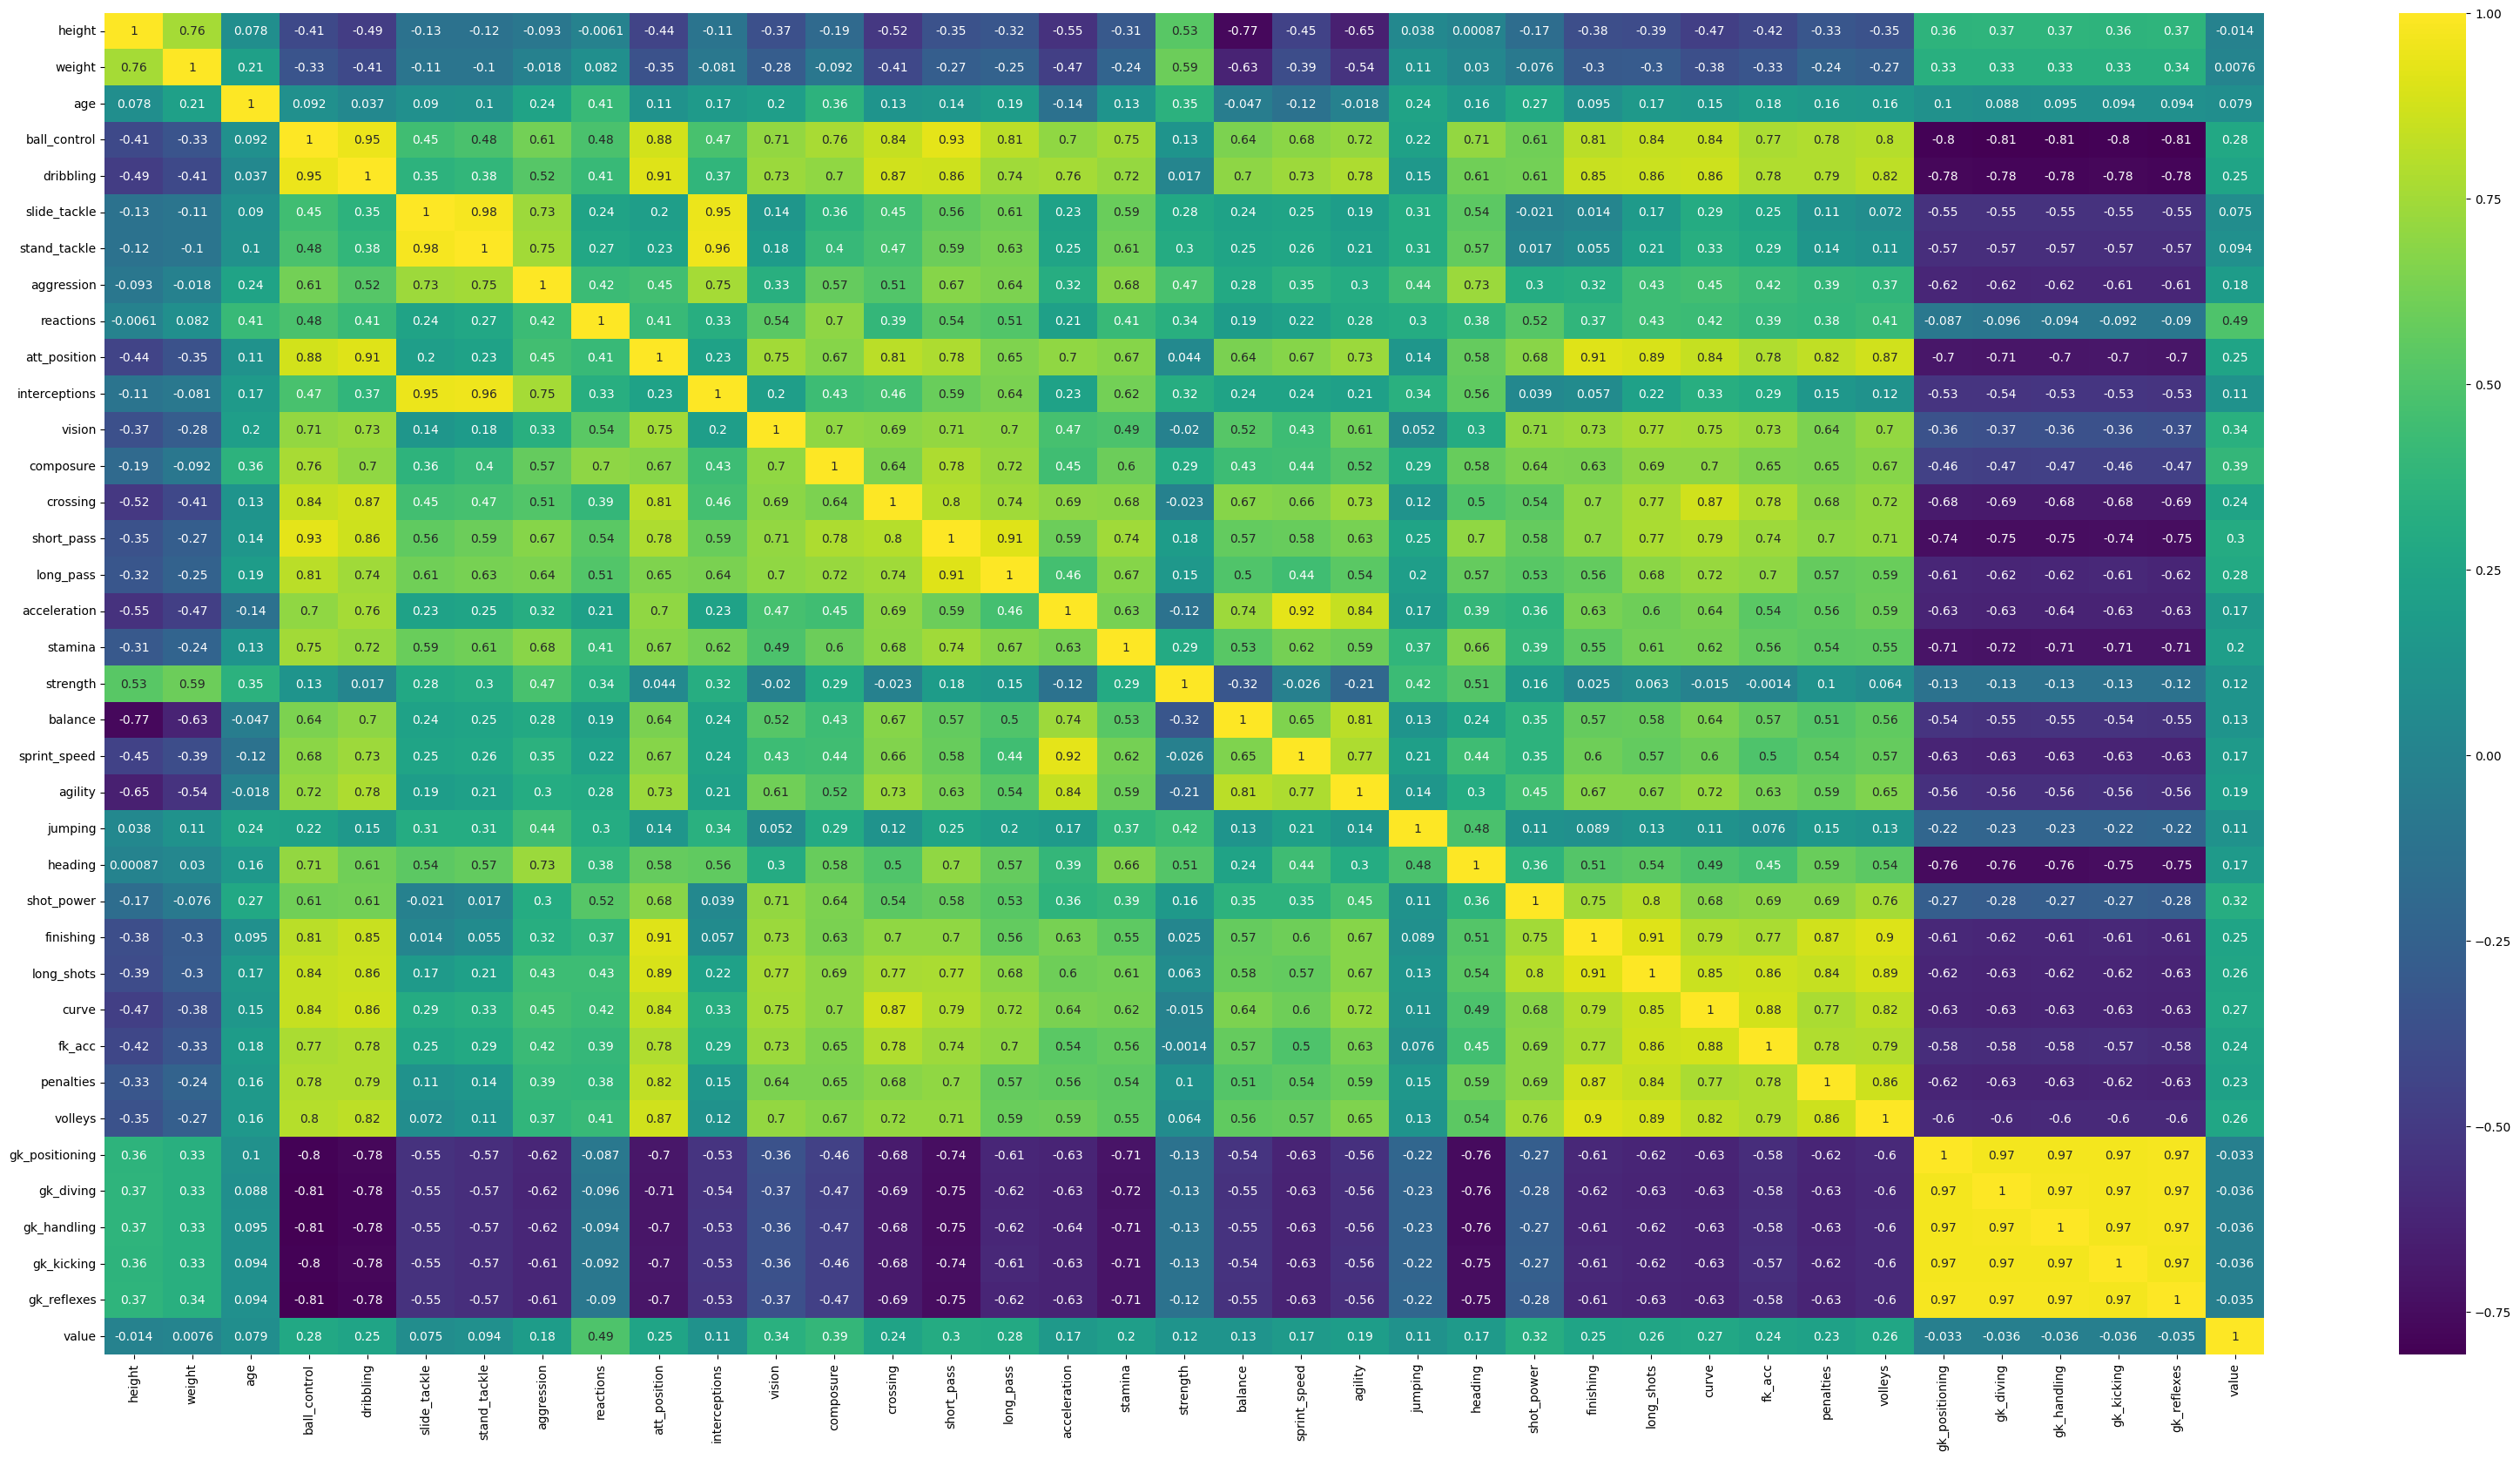

In [ ]:
plt.figure(figsize=(40,20))
sns.heatmap(df1.corr(), cmap='viridis', annot=True)

<Axes: xlabel='height', ylabel='dribbling'>

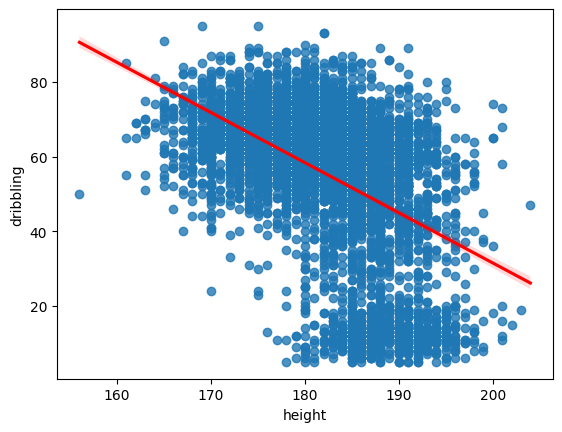

In [ ]:
sns.regplot(data=df1, x='height', y='dribbling', line_kws={'color': 'red'})

<Axes: xlabel='height', ylabel='strength'>

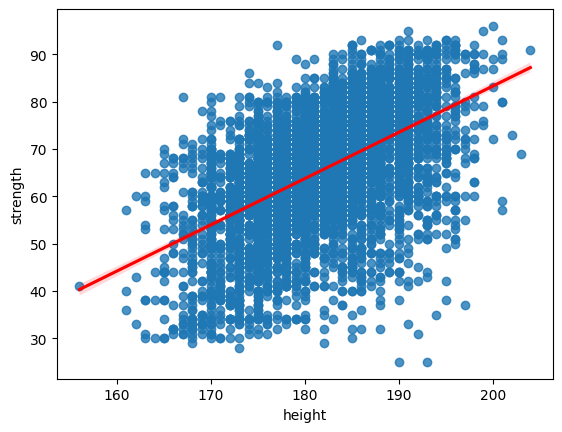

In [ ]:
sns.regplot(data=df1, x='height', y='strength', line_kws={'color': 'red'})

<Axes: xlabel='reactions', ylabel='value'>

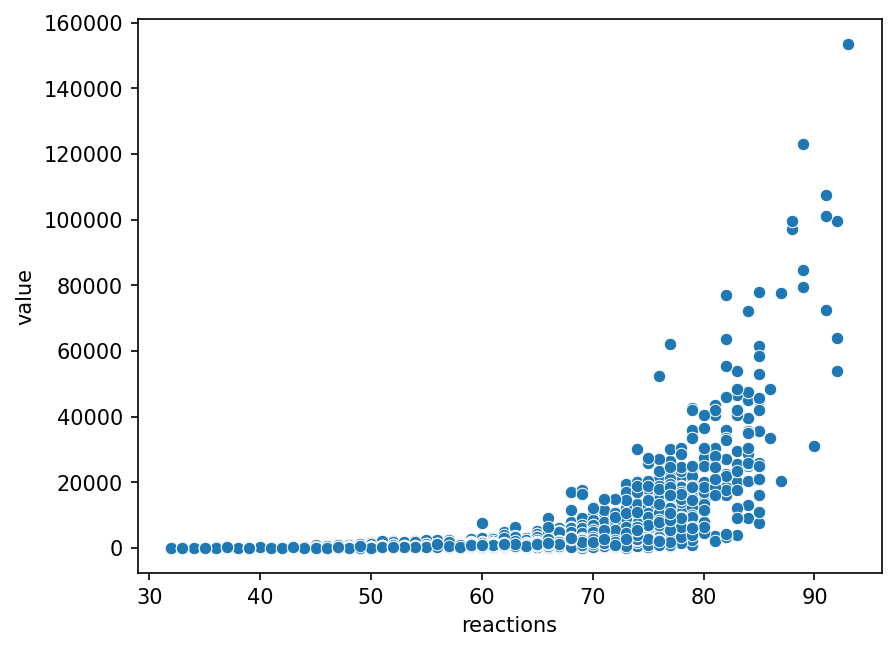

In [ ]:
plt.figure(dpi=150)
sns.scatterplot(data=df1, x='reactions', y='value')

<Axes: xlabel='reactions', ylabel='log_val'>

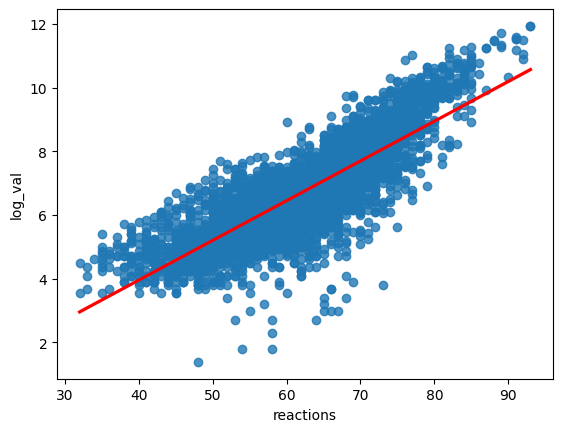

In [ ]:
df1['log_val'] = np.log(df1['value'])
sns.regplot(data=df1, x='reactions', y='log_val', line_kws={'color':'red'})

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df1['reactions'].values.reshape(-1, 1))

# Standardize the features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

Y = np.log(df1['value'])

X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, Y, test_size=0.3, random_state=101)

# Define the model and parameter grid for GridSearchCV
model = ElasticNet()
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

test_predictions = best_model.predict(X_test)

MAE = mean_absolute_error(y_test, test_predictions)
MSE = mean_squared_error(y_test, test_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, test_predictions)

# Convert R² score to percentage
accuracy_percentage = R2 * 100

print("Best Model Parameters:", grid_search.best_params_)
print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)
print(f"Accuracy: {accuracy_percentage:.2f}%")

Best Model Parameters: {'alpha': 0.1, 'l1_ratio': 1}
Mean Absolute Error (MAE): 0.5427402124906228
Mean Squared Error (MSE): 0.5142385621317784
Root Mean Squared Error (RMSE): 0.7171042895784255
Accuracy: 69.87%


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df1['reactions'].values.reshape(-1, 1))

# Standardize features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

Y = np.log(df1['value'])

X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, Y, test_size=0.3, random_state=101)

# Gradient Boosting Regressor with GridSearchCV
gbr = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_gbr = GridSearchCV(gbr, param_grid, cv=5, scoring='r2')
grid_search_gbr.fit(X_train, y_train)

# Best model from grid search
best_gbr = grid_search_gbr.best_estimator_

test_predictions_gbr = best_gbr.predict(X_test)

MAE_gbr = mean_absolute_error(y_test, test_predictions_gbr)
MSE_gbr = mean_squared_error(y_test, test_predictions_gbr)
RMSE_gbr = np.sqrt(MSE_gbr)
R2_gbr = r2_score(y_test, test_predictions_gbr)

accuracy_percentage_gbr = R2_gbr * 100

print("Best GBR Model Parameters:", grid_search_gbr.best_params_)
print("Mean Absolute Error (MAE) GBR:", MAE_gbr)
print("Mean Squared Error (MSE) GBR:", MSE_gbr)
print("Root Mean Squared Error (RMSE) GBR:", RMSE_gbr)
print(f"Accuracy GBR: {accuracy_percentage_gbr:.2f}%")


Best GBR Model Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mean Absolute Error (MAE) GBR: 0.5298713271025162
Mean Squared Error (MSE) GBR: 0.49317960252036414
Root Mean Squared Error (RMSE) GBR: 0.7022674722072525
Accuracy GBR: 71.10%


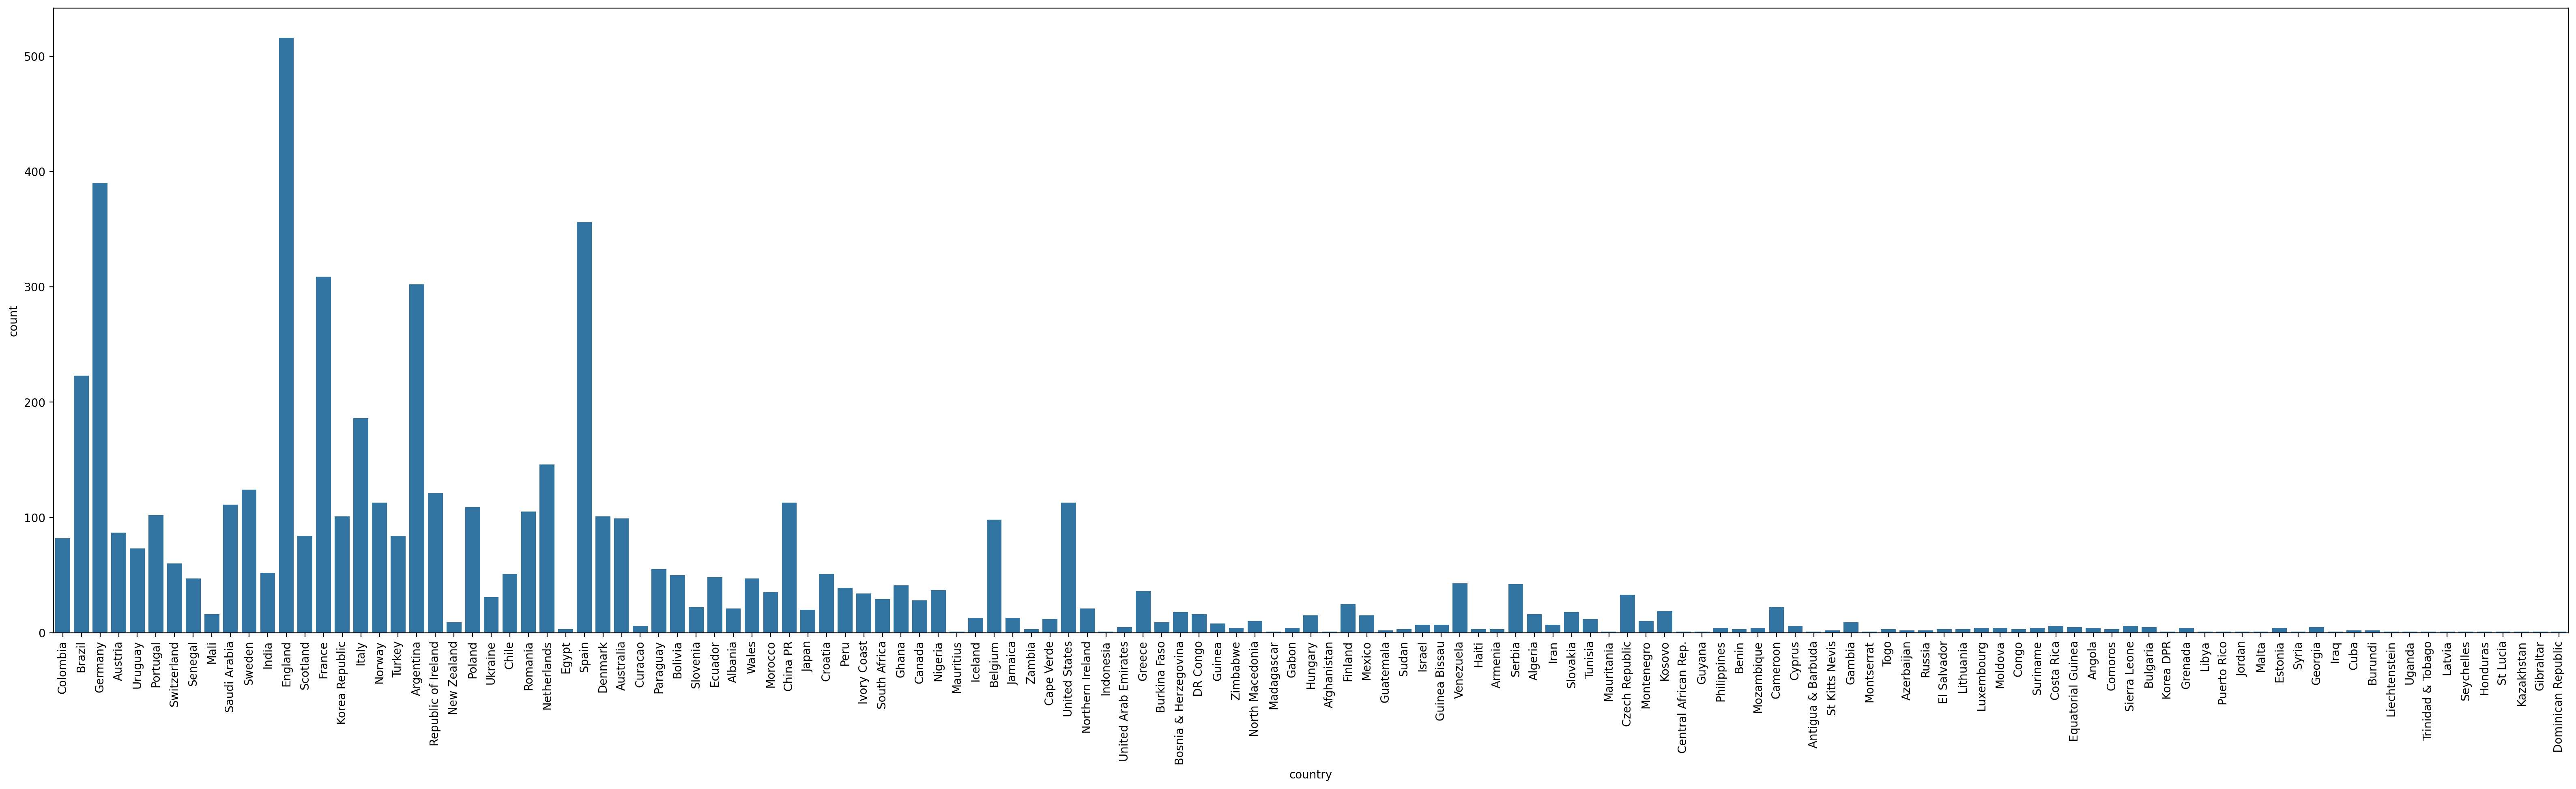

In [ ]:
plt.figure(figsize=(40, 10), dpi=200)
sns.countplot(data=df, x='country')
plt.xticks(rotation=90)
plt.show();

<Axes: xlabel='age', ylabel='Count'>

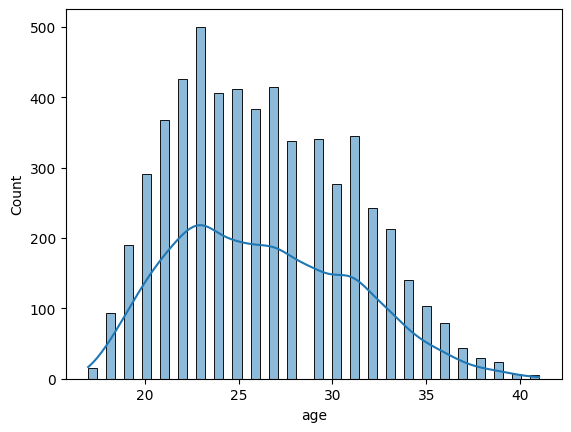

In [ ]:
sns.histplot(data=df, x='age', bins=50, kde=True)

<Axes: xlabel='value', ylabel='Count'>

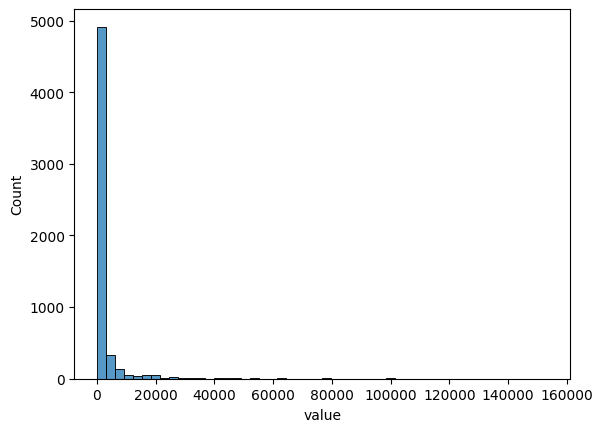

In [ ]:
sns.histplot(data=df1, x='value', bins=50)

<Axes: xlabel='dribbling', ylabel='Count'>

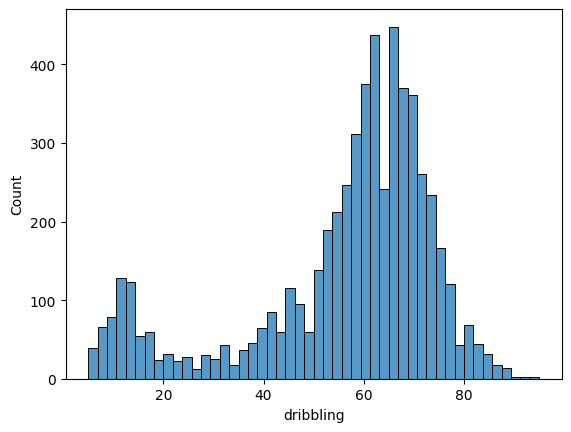

In [ ]:
sns.histplot(data=df1, x='dribbling')

<Axes: xlabel='stamina', ylabel='Count'>

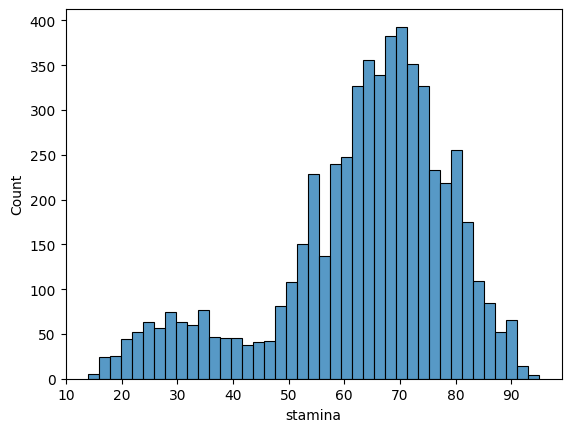

In [ ]:
sns.histplot(data=df1, x='stamina')

In [ ]:
def get_continent_by_country(country):
    continents = {
        'Africa': [
            'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon',
            'Central African Republic', 'Chad', 'Comoros', 'Republic of the Congo', 'Democratic Republic of the Congo',
            'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia, The',
            'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
            'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
            'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa',
            'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
        ],
        'Asia': [
            'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan',
            'British Indian Ocean Territory', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Egypt', 'Georgia',
            'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan',
            'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar',
            'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia',
            'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand',
            'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'
        ],
        'Europe': [
            'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
            'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany',
            'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Latvia', 'Liechtenstein', 'Lithuania',
            'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
            'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
            'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City',
            'Åland', 'Channel Islands', 'Faroe Islands', 'Gibraltar', 'Guernsey', 'Isle of Man', 'Jersey', 'Kosovo',
            'Northern Cyprus', 'Northern Ireland', 'Svalbard'
        ],
        'North America': [
            'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica',
            'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
            'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
            'Trinidad and Tobago', 'United States of America'
        ],
        'Oceania': [
            'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau',
            'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
        ],
        'South America': [
            'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru',
            'Suriname', 'Uruguay', 'Venezuela'
        ]

    }

    for continent, countries in continents.items():
        if country in countries:
            return continent
df['continent'] = df['country'].apply(get_continent_by_country)
df.head()
df.shape

(5682, 42)

Text(0, 0.5, 'Average Stamina')

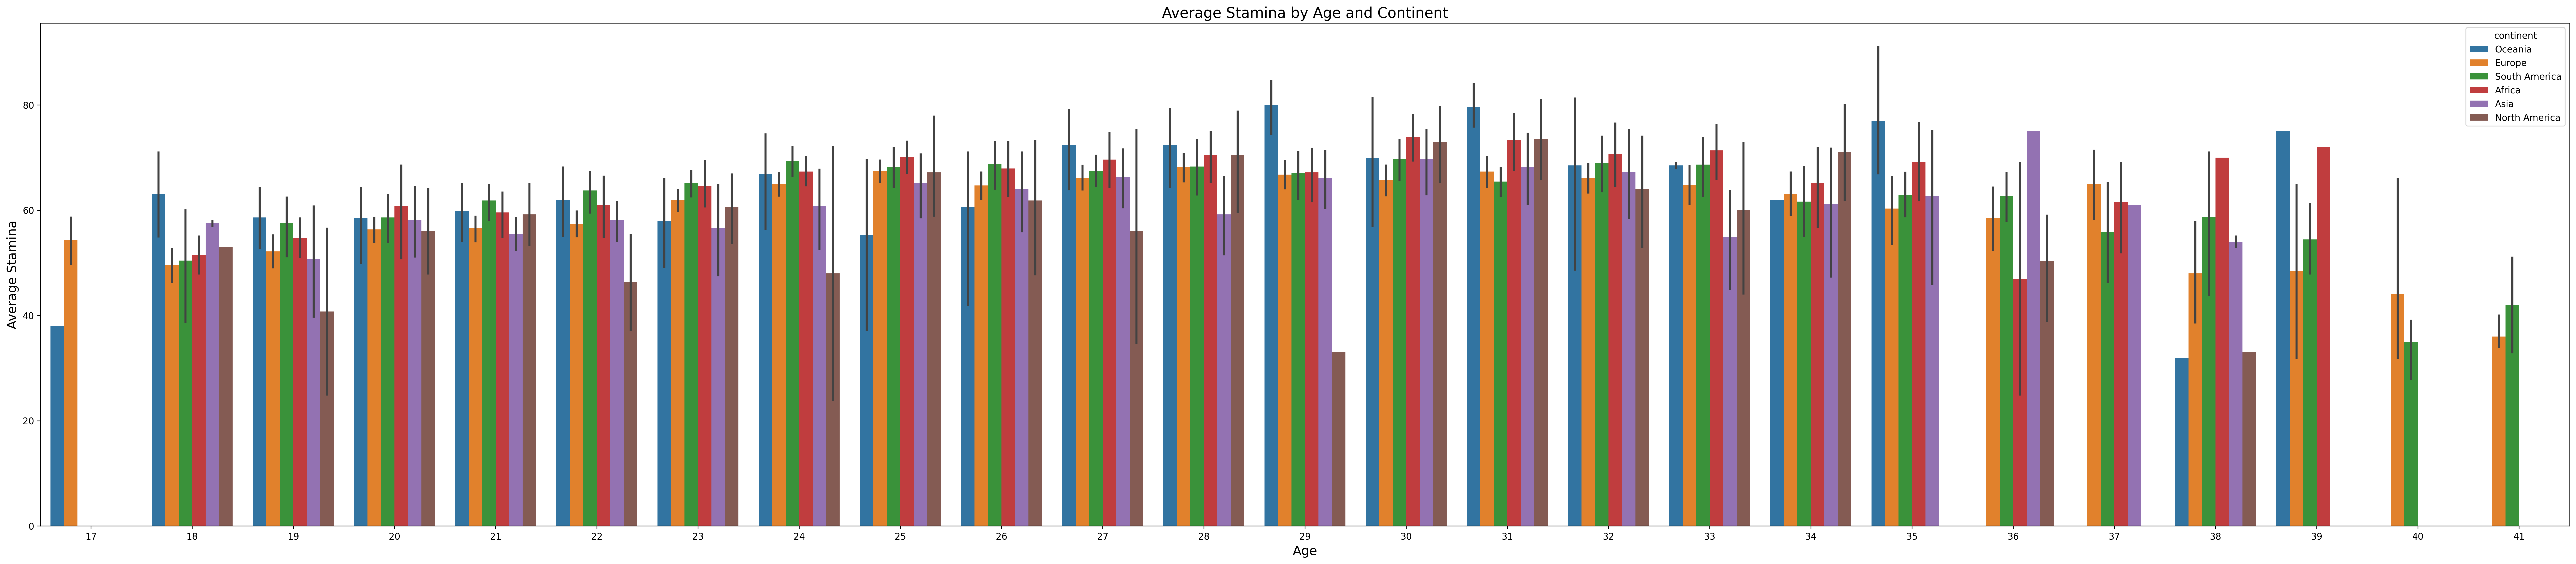

In [ ]:
plt.figure(figsize=(50,10), dpi=300)
sns.barplot(data=df, x='age', y='stamina', hue='continent')
plt.title('Average Stamina by Age and Continent', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Stamina', fontsize=14)

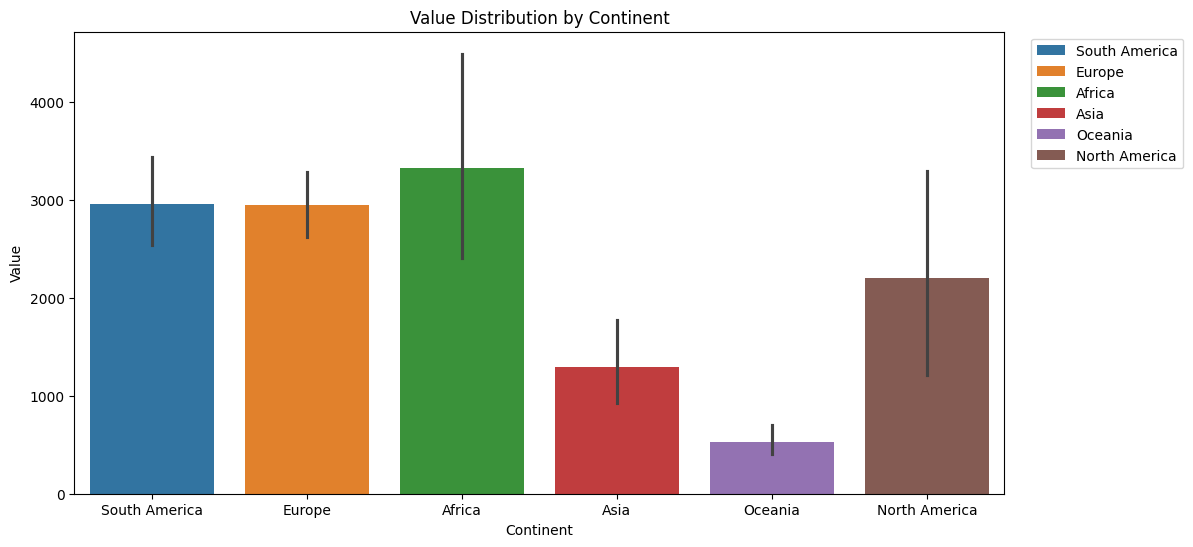

In [ ]:
plt.figure(figsize=(12, 6))
df['value'] = df1['value']
sns.barplot(data=df, x='continent', y='value', hue='continent')
plt.title('Value Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.2, 1))
plt.show()

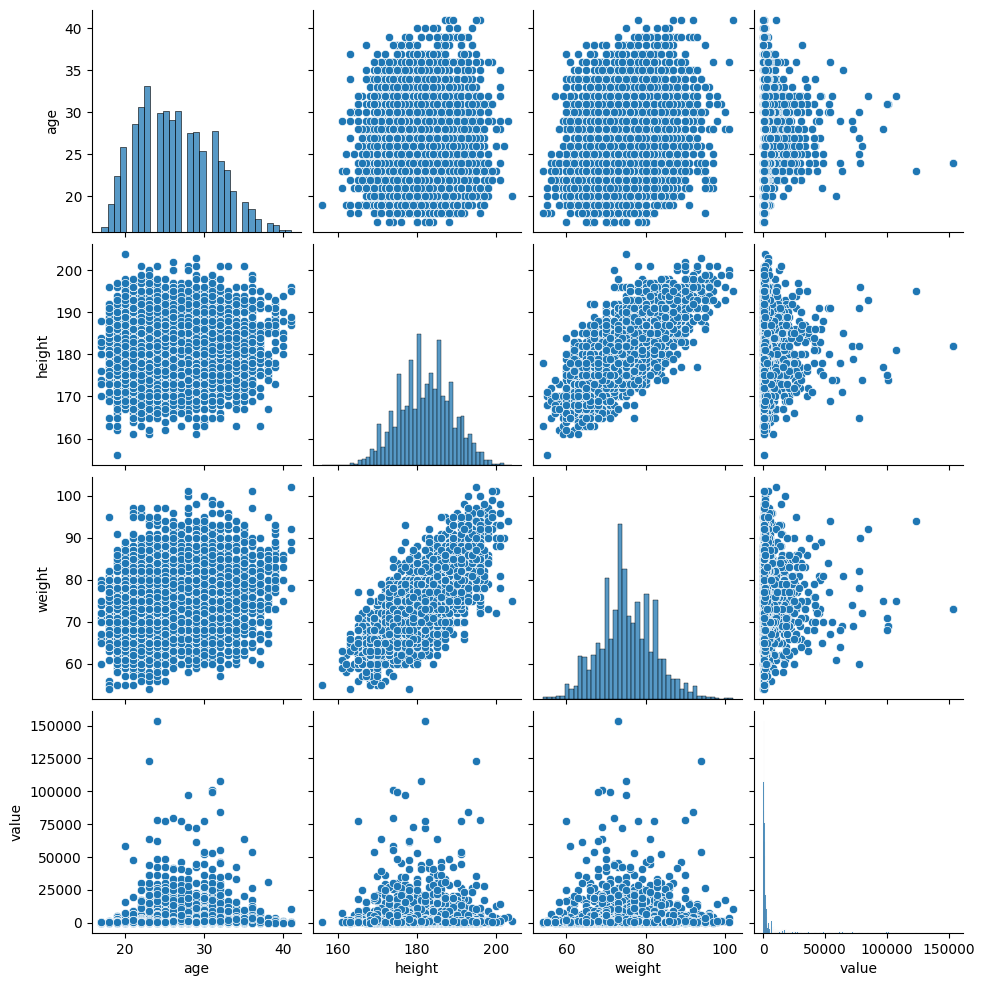

In [ ]:
sns.pairplot(df1[['age', 'height', 'weight', 'value']])
plt.show()

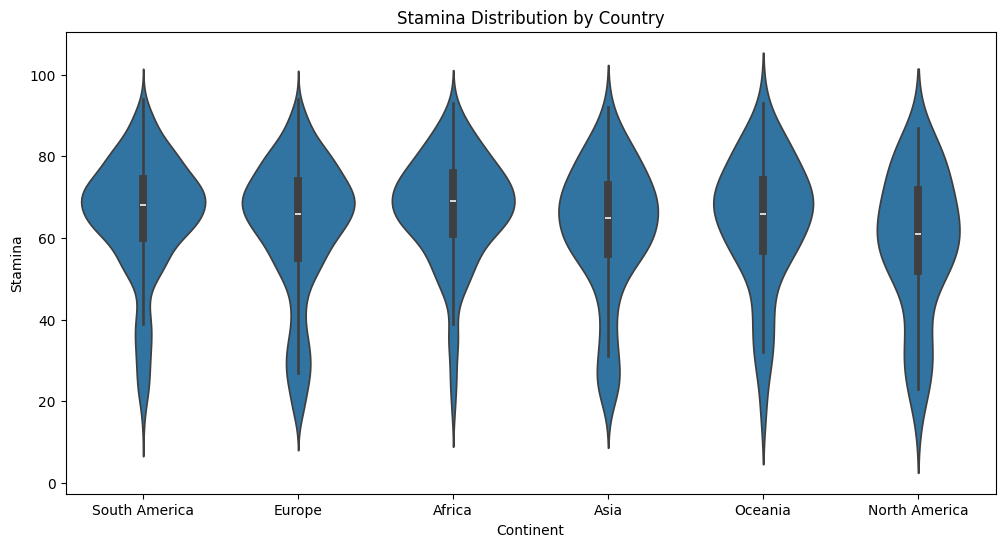

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='continent', y='stamina')
plt.title('Stamina Distribution by Country')
plt.xlabel('Continent')
plt.ylabel('Stamina')
plt.show()

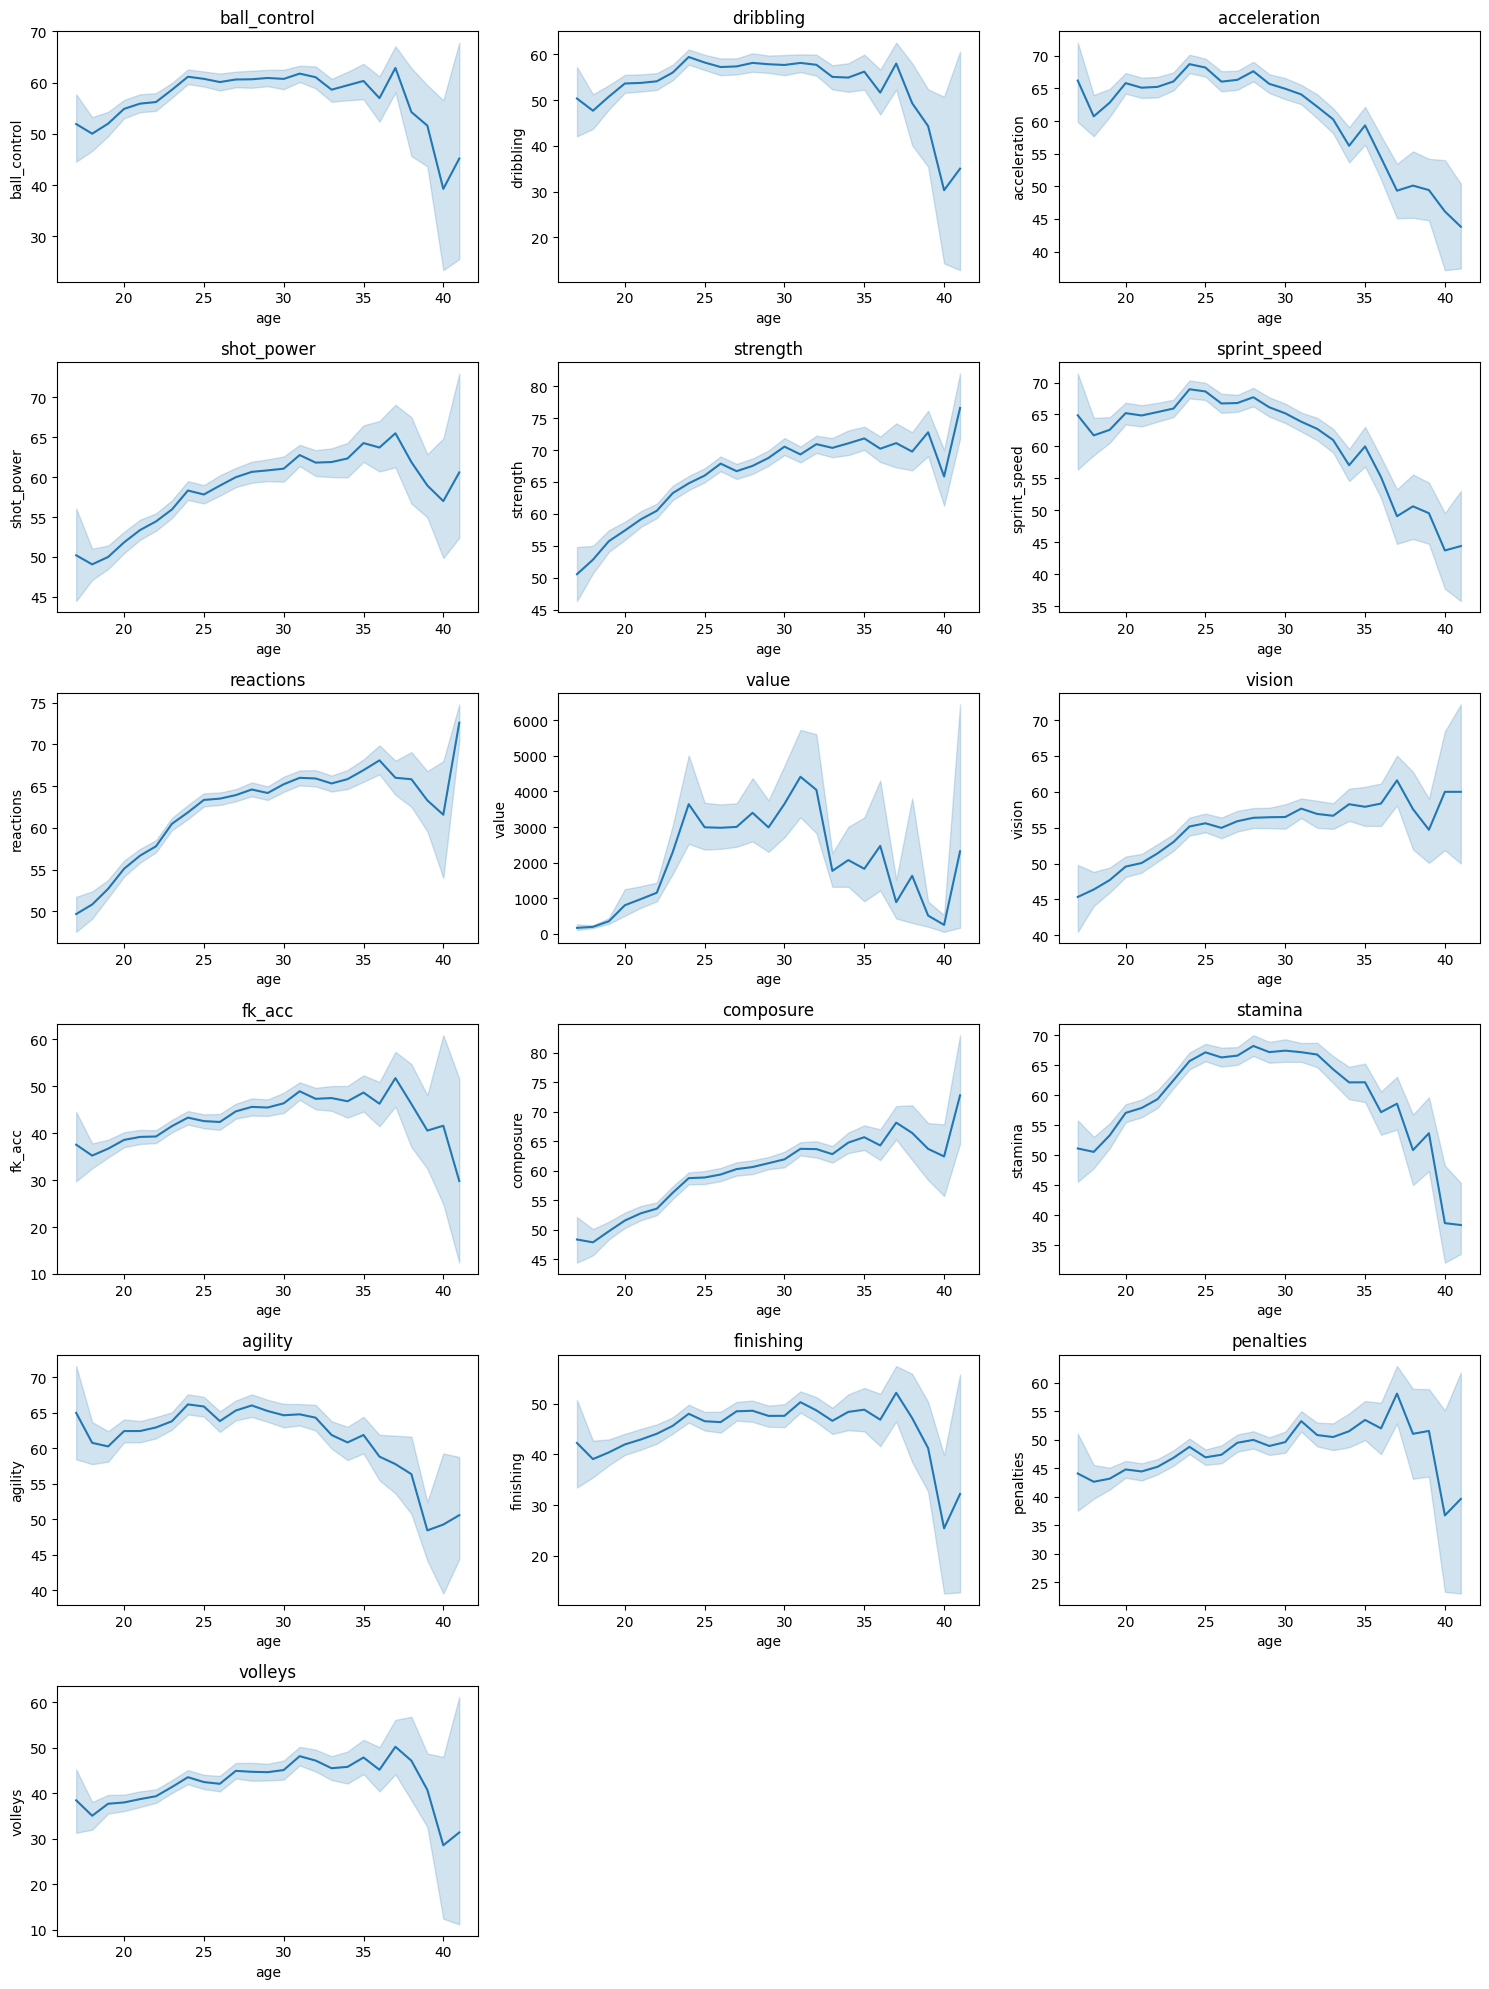

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

# List of features to plot (excluding 'age' which will be fixed on x-axis)
features_to_plot = ['ball_control', 'dribbling', 'acceleration', 'shot_power', 'strength', 'sprint_speed', 'reactions', 'value', 'vision', 'fk_acc', 'composure', 'stamina', 'agility', 'finishing', 'penalties', 'volleys']

# Plotting each feature on the same figure with 'age' on x-axis
for i, feature in enumerate(features_to_plot):
    sns.lineplot(data=df, x='age', y=feature, ax=axes[i])
    axes[i].set_title(feature)  # Set title for each subplot

# Remove any unused subplots
for j in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

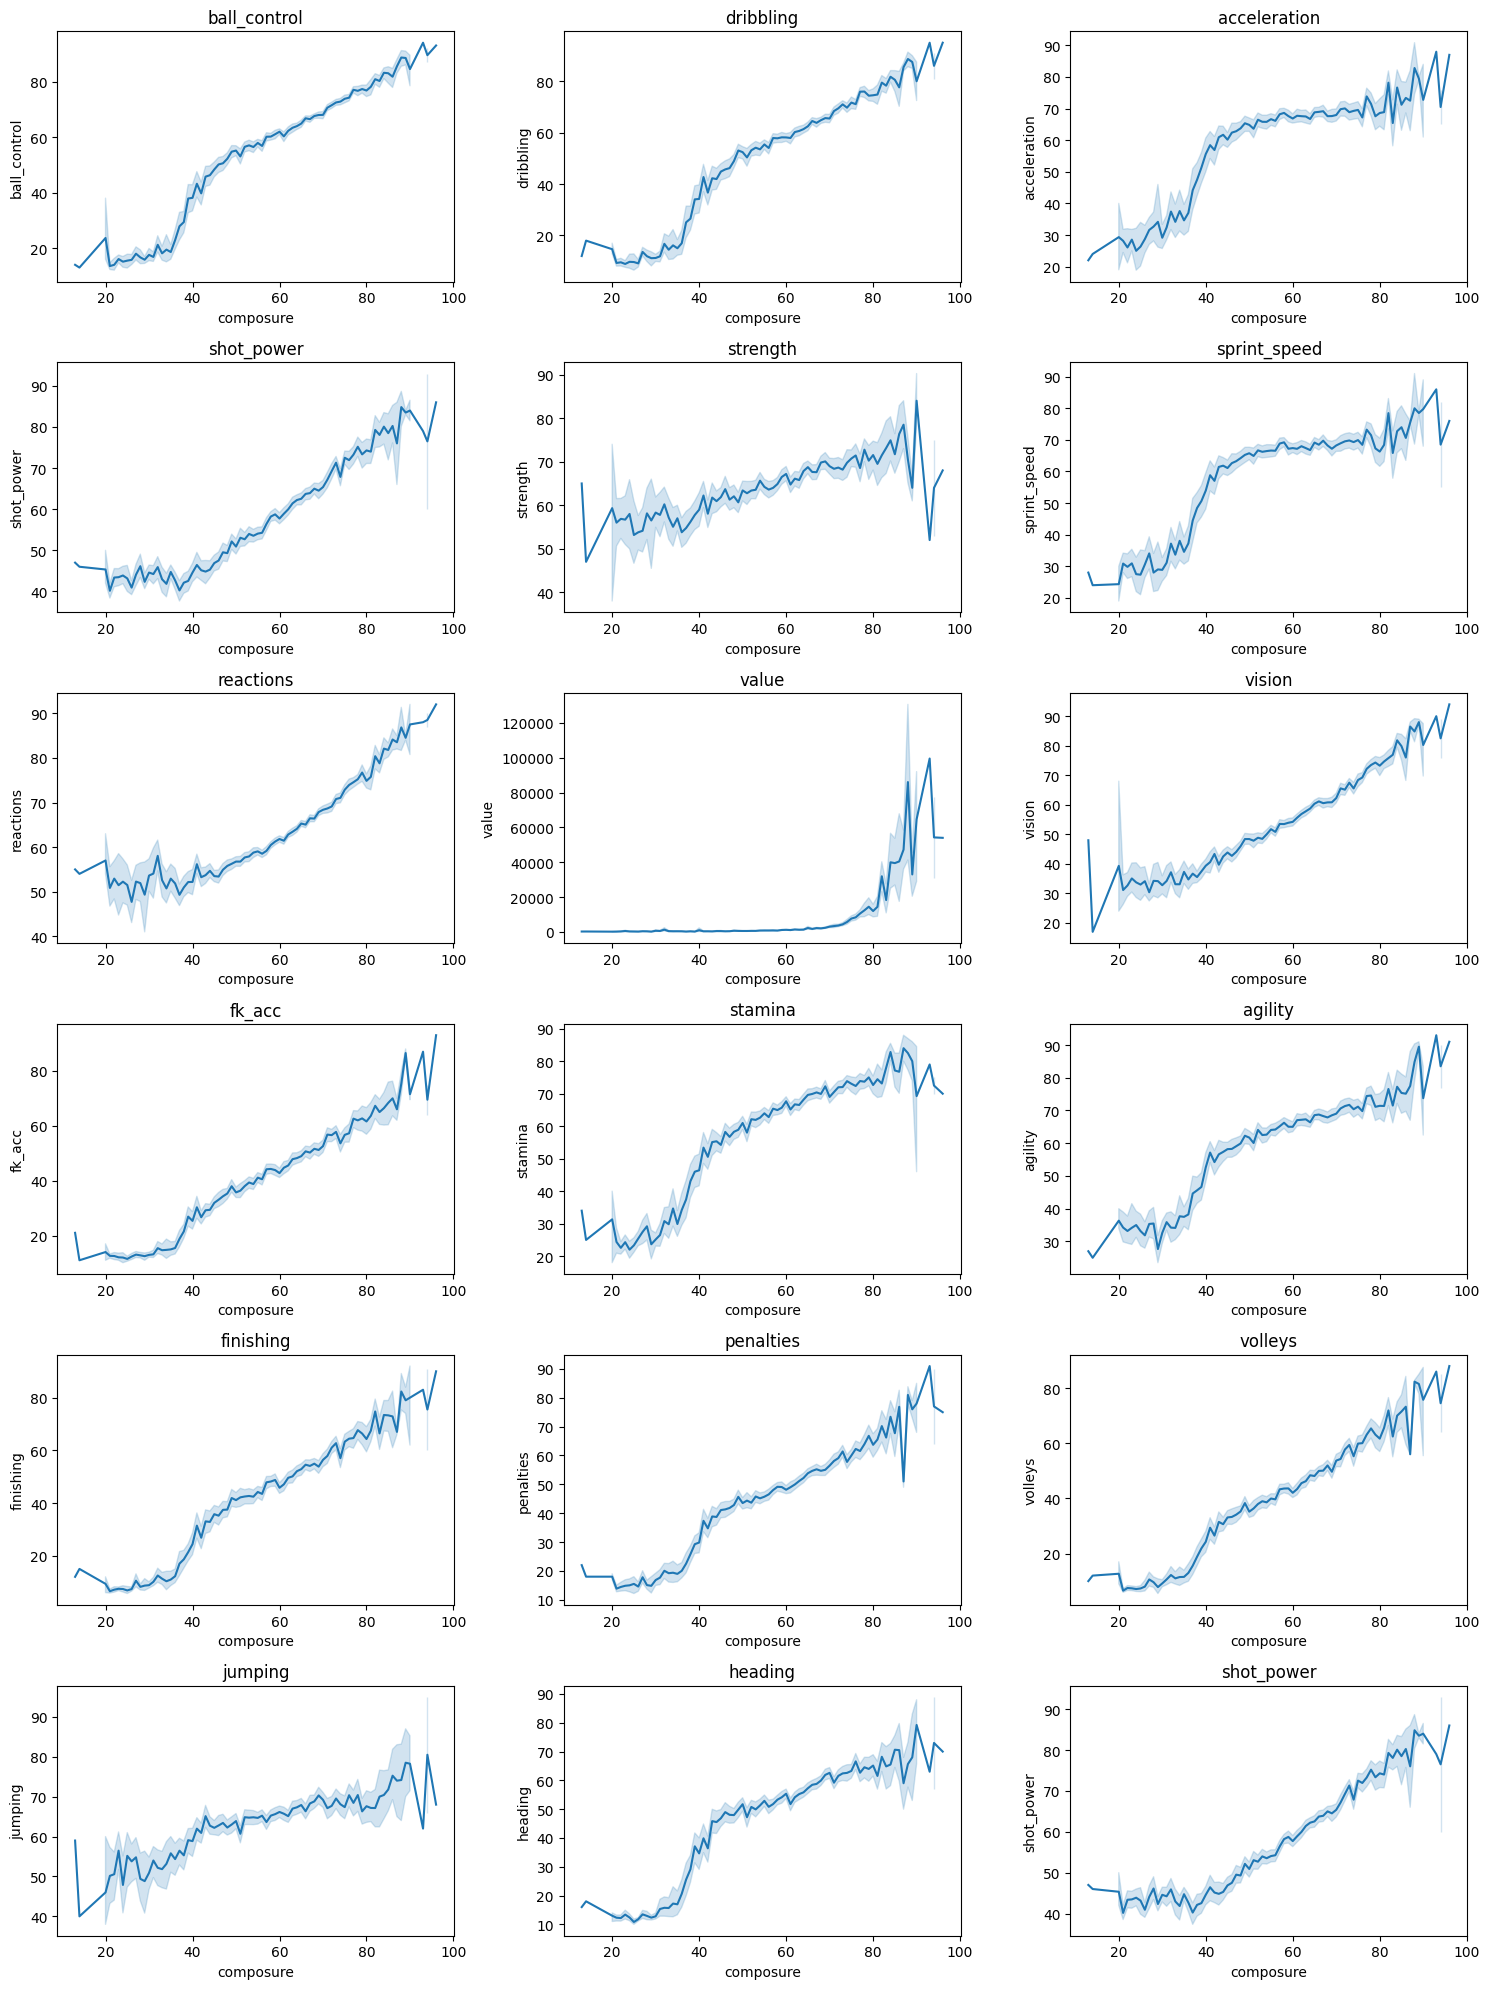

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

# List of features to plot (excluding 'age' which will be fixed on x-axis)
features_to_plot = ['ball_control', 'dribbling', 'acceleration', 'shot_power', 'strength', 'sprint_speed', 'reactions', 'value', 'vision', 'fk_acc', 'stamina', 'agility', 'finishing', 'penalties', 'volleys', 'jumping', 'heading', 'shot_power']

# Plotting each feature on the same figure with 'age' on x-axis
for i, feature in enumerate(features_to_plot):
    sns.lineplot(data=df, x='composure', y=feature, ax=axes[i])
    axes[i].set_title(feature)  # Set title for each subplot

# Remove any unused subplots
for j in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

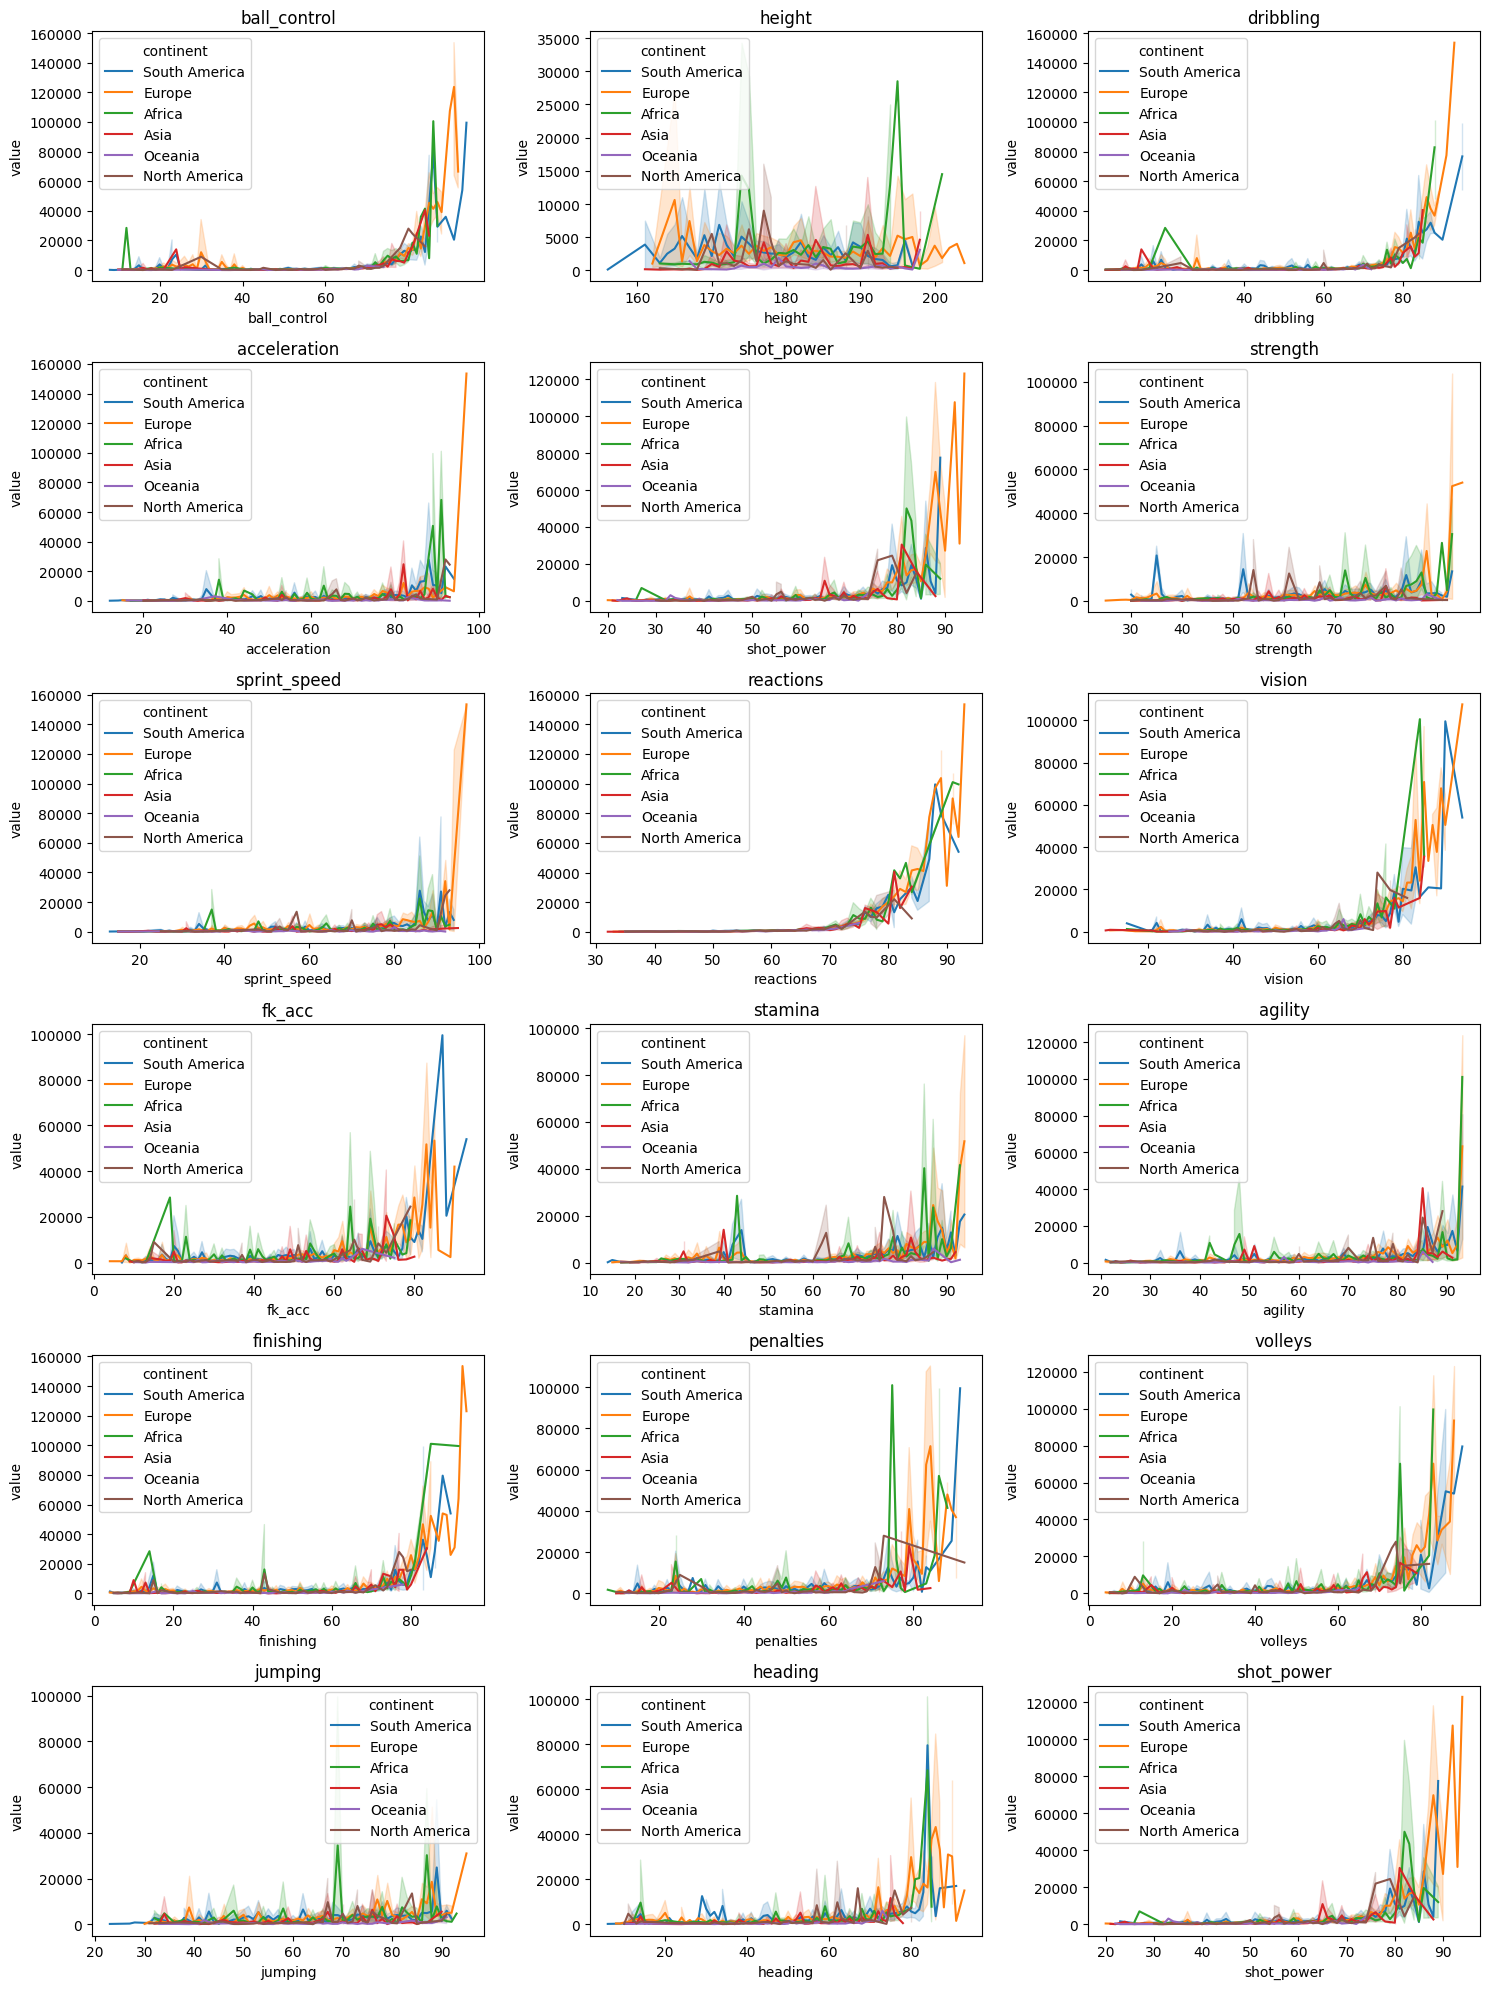

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array

# List of features to plot (excluding 'age' which will be fixed on x-axis)
features_to_plot = ['ball_control', 'height', 'dribbling', 'acceleration', 'shot_power', 'strength', 'sprint_speed', 'reactions', 'vision', 'fk_acc', 'stamina', 'agility', 'finishing', 'penalties', 'volleys', 'jumping', 'heading', 'shot_power']

# Plotting each feature on the same figure with 'age' on x-axis
for i, feature in enumerate(features_to_plot):
    sns.lineplot(data=df, x=feature, y='value', ax=axes[i], hue='continent')
    axes[i].set_title(feature)  # Set title for each subplot

# Remove any unused subplots
for j in range(len(features_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()